In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create DataFrame from the data
data = pd.read_csv('diabetes.csv')  # Assuming the data is saved as CSV
# If you're copying directly, you can use:
# data = pd.read_csv(io.StringIO(<your_data_string>))

# 1. Check for missing values (in this dataset, 0 might indicate missing data for some columns)
print("Initial data info:")
print(data.info())
print("\nMissing values (zeros):")
print((data == 0).sum())

# Columns where 0 is unrealistic and likely indicates missing data
columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2. Handle missing data - replace 0s with median for these columns
for column in columns_with_missing:
    median_value = data[column][data[column] != 0].median()
    data[column] = data[column].replace(0, median_value)

print("\nAfter handling missing values:")
print((data == 0).sum())

# 3. Separate features and target
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target

# 4. Normalize/Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class distribution
)

# Print shapes of resulting datasets
print("\nDataset shapes:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Testing labels: {y_test.shape}")

# Optional: Check basic statistics of the scaled features
print("\nScaled features statistics:")
print(X_train.describe())

# Save preprocessed data if needed
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing values (zeros):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11

#TASK2

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

class Linear_Regression():

  #initiating the parameters (learning rate & no of iterations)
  def __init__(self, learning_rate, no_of_iterations):
     self.learning_rate = learning_rate
     self.no_of_iterations = no_of_iterations

  def fit(self, x, y):

    # no of training examples & no of features

    self.m, self.n = x.shape # no of rows & columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

    #implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_prediction = self.predict(self.x)

    #calculate gradients

    dw = -(2 * (self.x.T).dot(self.y - y_prediction))/ self.m

    db = -2*np.sum(self.y - y_prediction)/self.m

    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, x):
    return x.dot(self.w) + self.b


# Load the data
housing_df = pd.read_csv('/content/Housing.csv')

# 1. Preprocessing
mapping_yes_no = {"yes": 1, "no": 0}
mapping_furnishing = {"unfurnished": 0, "semi-furnished": 1, "furnished": 2}

# Apply mappings
for col in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
    housing_df[col] = housing_df[col].map(mapping_yes_no)

housing_df["furnishingstatus"] = housing_df["furnishingstatus"].map(mapping_furnishing)
print(housing_df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [ ]:
x = housing_df.iloc[:, 1:].values
y = housing_df.iloc[:, 0].values
print(x)
print(y)

[[7420    4    2 ...    2    1    2]
 [8960    4    4 ...    3    0    2]
 [9960    3    2 ...    2    1    1]
 ...
 [3620    2    1 ...    0    0    0]
 [2910    3    1 ...    0    0    2]
 [3850    3    1 ...    0    0    0]]
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
x = standardized_data
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state= 2)

print(x)
print(y)

[[ 1.04672629  1.40341936  1.42181174 ...  1.51769249  1.80494113
   1.40628573]
 [ 1.75700953  1.40341936  5.40580863 ...  2.67940935 -0.55403469
   1.40628573]
 [ 2.21823241  0.04727831  1.42181174 ...  1.51769249  1.80494113
   0.09166185]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.80574124 -0.55403469
  -1.22296203]
 [-1.03338891  0.04727831 -0.57018671 ... -0.80574124 -0.55403469
   1.40628573]
 [-0.5998394   0.04727831 -0.57018671 ... -0.80574124 -0.55403469
  -1.22296203]]
[ 4.56636513e+00  4.00448405e+00  4.00448405e+00  3.98575468e+00
  3.55497918e+00  3.25530927e+00  2.88072189e+00  2.88072189e+00
  2.73088693e+00  2.69342819e+00  2.69342819e+00  2.62974834e+00
  2.43121702e+00  2.39375829e+00  2.39375829e+00  2.31884081e+00
  2.31884081e+00  2.24392333e+00  2.20646459e+00  2.18773522e+00
  2.13154711e+00  2.09408838e+00  2.07535901e+00  2.07535901e+00
  2.03790027e+00  2.01917090e+00  1.97796629e+00  1.94425342e+00
  1.94425342e+00  1.94425342e+00  1.94425342e+00  1.9

In [ ]:
model = Linear_Regression(learning_rate= 0.005, no_of_iterations= 1000)
model.fit(x_train, y_train)
print("weights = ", model.w)
print("bias = ", model.b)

weights =  [0.2703659  0.03115495 0.26351827 0.19596638 0.05933754 0.07052493
 0.10249914 0.09214227 0.23053779 0.13127955 0.14840287 0.10552217]
bias =  -0.013459996538281354


In [ ]:
# Make predictions on the training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate MSE and R² for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and R² for test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("📊 Training Performance:")
print("  ➤ MSE:", train_mse)
print("  ➤ R² Score:", train_r2)

print("\n📊 Test Performance:")
print("  ➤ MSE:", test_mse)
print("  ➤ R² Score:", test_r2)

📊 Training Performance:
  ➤ MSE: 0.3024508928204032
  ➤ R² Score: 0.6903759217208941

📊 Test Performance:
  ➤ MSE: 0.36736826229168673
  ➤ R² Score: 0.6509529217799255


#TASK 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter

In [ ]:
class KNN:
    def __init__(self, k):
        if not isinstance(k, int) or k <= 0:
            raise ValueError("k must be a positive integer")
        self.k = k

    def fit(self, X, y):
        # Convert inputs to numpy arrays to ensure consistent indexing
        self.X_train = np.array(X)
        self.y_train = np.array(y)

        # Validate input shapes
        if self.X_train.shape[0] != self.y_train.shape[0]:
            raise ValueError("Number of samples in X and y must match")
        if self.k > self.X_train.shape[0]:
            raise ValueError(f"k ({self.k}) cannot be larger than the number of training samples ({self.X_train.shape[0]})")

    def predict(self, X):
        # Convert test data to numpy array
        X = np.array(X)
        if X.shape[1] != self.X_train.shape[1]:
            raise ValueError("Number of features in test data must match training data")
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute Euclidean distances between x and all training samples

        # Avoiding square root to save extra computation because if a number's square is larger,
        #the square root of that square is also going to be larger

        distances = [np.sum((x - x_train) ** 2) for x_train in self.X_train]

        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Perform majority voting
        majority = Counter(k_nearest_labels).most_common(1)
        return majority[0][0]

In [ ]:
iris_df = pd.read_csv('/content/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris_df['species'].value_counts()
x = iris_df.drop(columns='species', axis=1)
y = iris_df['species']

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
x = standardized_data
print(x)
print(y)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 3)
print(x.shape, x_train.shape, x_test.shape)

(150, 4) (105, 4) (45, 4)


In [ ]:
classifier = KNN(k=5)
classifier.fit(x_train, y_train)
# Accuracy Score for Training Data
x_train_pred = classifier.predict(x_train)
training_data_acc = accuracy_score(y_train, x_train_pred)
print('Accuracy of the KNN Classifier on Training Data: ', training_data_acc)

# Accuracy Score for the test data
x_test_pred = classifier.predict(x_test)
test_data_acc = accuracy_score(y_test, x_test_pred)

print('Accuracy of the SVM Classifier on test Data: ', test_data_acc)

Accuracy of the KNN Classifier on Training Data:  0.9428571428571428
Accuracy of the SVM Classifier on test Data:  0.9555555555555556



KNN Classifier (k=5) Performance on Test Data:
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


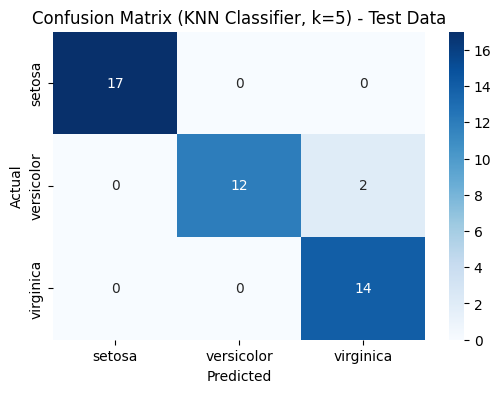

In [ ]:
#Used average = 'macro' because the iris dataset is a balanced dataset and we have more than 2 classes
precision = precision_score(y_test, x_test_pred, average='macro')
recall = recall_score(y_test, x_test_pred, average='macro')
f1 = f1_score(y_test, x_test_pred, average='macro')

print("\nKNN Classifier (k=5) Performance on Test Data:")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, x_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN Classifier, k=5) - Test Data')
plt.show()


KNN Classifier (k=1):
Training Accuracy: 1.0000
Test Accuracy: 0.8889
Precision (macro): 0.8862
Recall (macro): 0.8852
F1-Score (macro): 0.8837


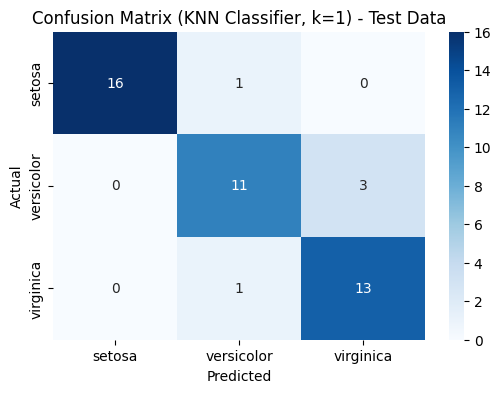

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=2):
Training Accuracy: 1.0000
Test Accuracy: 0.8889
Precision (macro): 0.8862
Recall (macro): 0.8852
F1-Score (macro): 0.8837


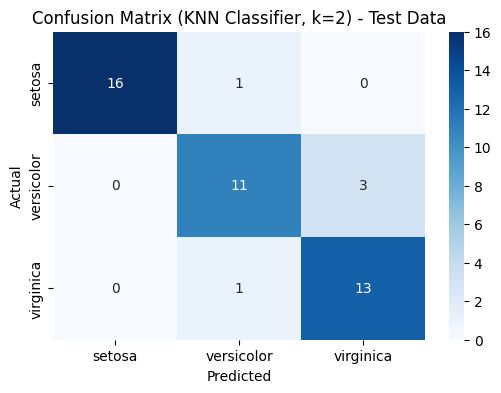

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=3):
Training Accuracy: 0.9524
Test Accuracy: 0.9333
Precision (macro): 0.9299
Recall (macro): 0.9286
F1-Score (macro): 0.9285


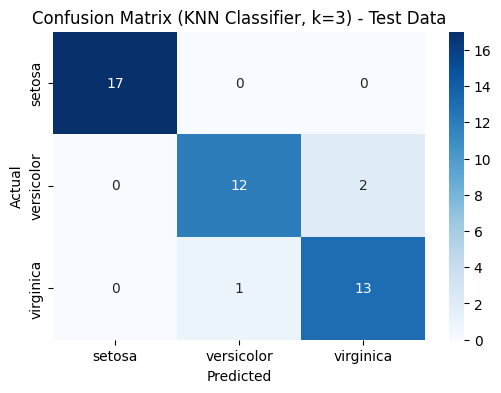

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=4):
Training Accuracy: 0.9714
Test Accuracy: 0.8889
Precision (macro): 0.8862
Recall (macro): 0.8852
F1-Score (macro): 0.8837


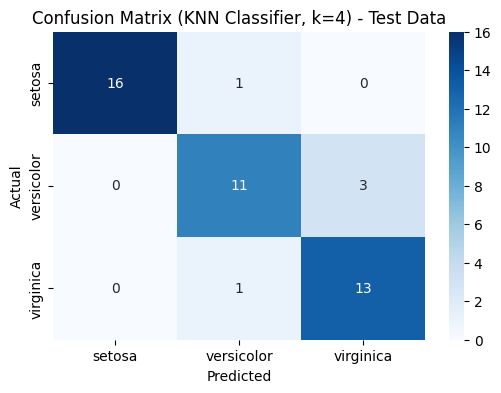

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=5):
Training Accuracy: 0.9429
Test Accuracy: 0.9556
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


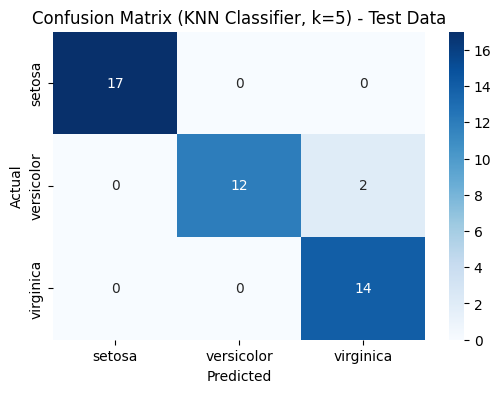

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=6):
Training Accuracy: 0.9429
Test Accuracy: 0.9556
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


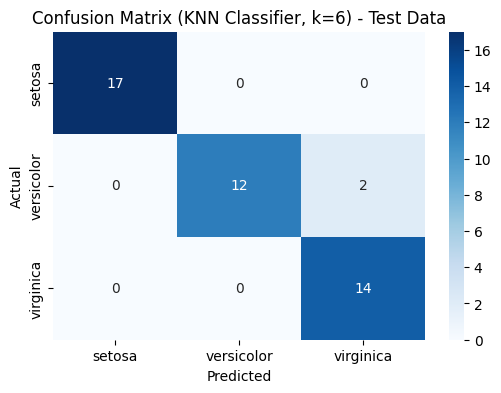

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=7):
Training Accuracy: 0.9429
Test Accuracy: 0.9556
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


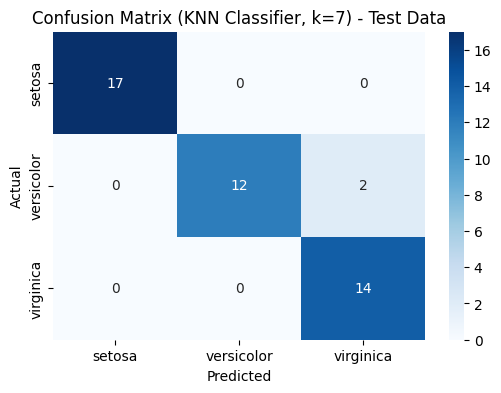

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=8):
Training Accuracy: 0.9524
Test Accuracy: 0.9556
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


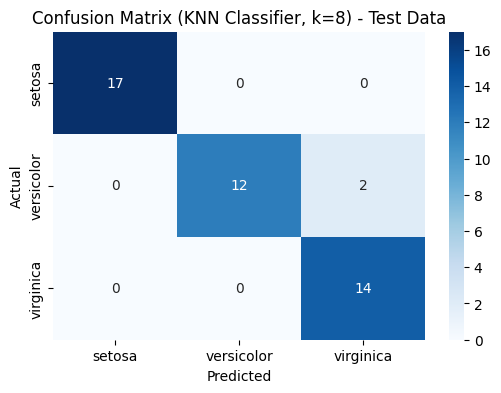

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=9):
Training Accuracy: 0.9429
Test Accuracy: 0.9556
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


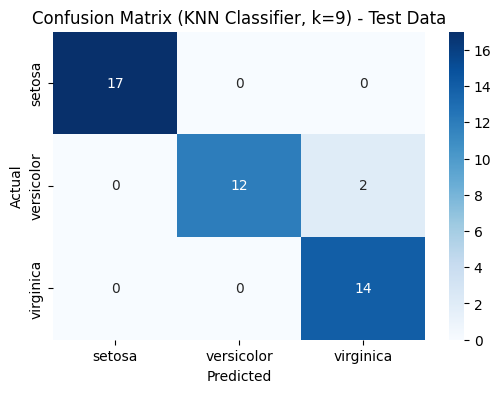

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=10):
Training Accuracy: 0.9524
Test Accuracy: 0.9333
Precision (macro): 0.9299
Recall (macro): 0.9286
F1-Score (macro): 0.9285


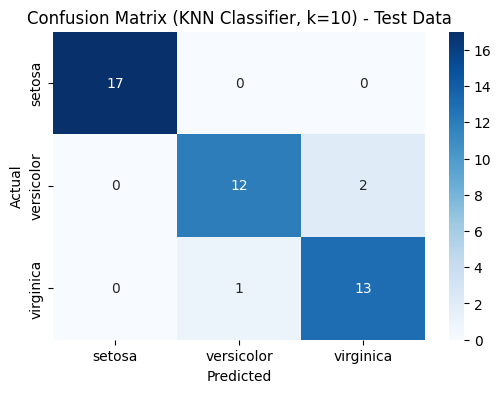

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=11):
Training Accuracy: 0.9429
Test Accuracy: 0.9556
Precision (macro): 0.9583
Recall (macro): 0.9524
F1-Score (macro): 0.9521


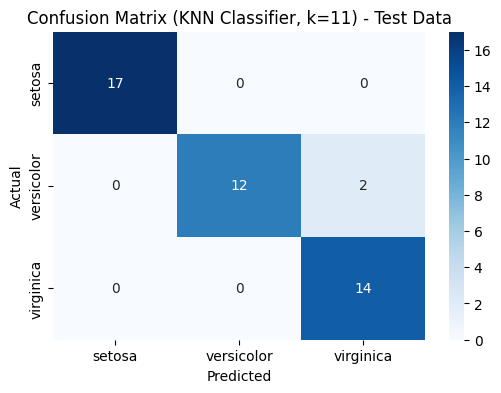

---------------------------------------------------------------------------------------------------------------------------

KNN Classifier (k=12):
Training Accuracy: 0.9714
Test Accuracy: 0.9333
Precision (macro): 0.9299
Recall (macro): 0.9286
F1-Score (macro): 0.9285


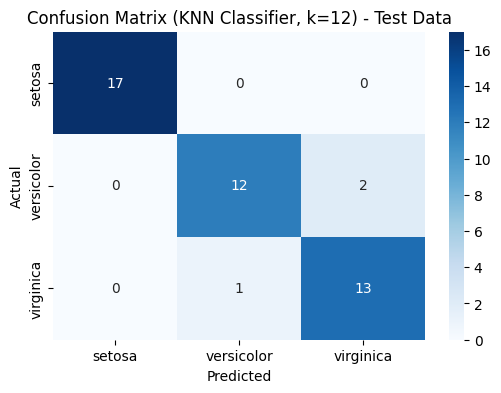

---------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Since there are 150 total values in the dataset, let's check the result for different k's ranging from k = 1 to k = sqrt(150) ~ 12

for k in range(1, 13):
    classifier = KNN(k=k)
    classifier.fit(x_train, y_train)

    # Training data
    x_train_pred = classifier.predict(x_train)
    training_data_acc = accuracy_score(y_train, x_train_pred)

    # Test data
    x_test_pred = classifier.predict(x_test)
    test_data_acc = accuracy_score(y_test, x_test_pred)
    precision = precision_score(y_test, x_test_pred, average='macro')
    recall = recall_score(y_test, x_test_pred, average='macro')
    f1 = f1_score(y_test, x_test_pred, average='macro')

    print(f"\nKNN Classifier (k={k}):")
    print(f"Training Accuracy: {training_data_acc:.4f}")
    print(f"Test Accuracy: {test_data_acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-Score (macro): {f1:.4f}")

    # Plot confusion matrix for test data
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (KNN Classifier, k={k}) - Test Data')
    plt.show()

    print('---------------------------------------------------------------------------------------------------------------------------')